In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
from sklearn.covariance import EllipticEnvelope
from itertools import combinations
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
%matplotlib inline
# from pptx import Presentation
# from pptx.util import Inches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import TSNE
from colour import Color
from sklearn.covariance import EllipticEnvelope
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
#import pingouin as pg
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import chart_studio as cs
import numpy as np
import pandas as pd
import scipy
import chart_studio.plotly as py
from plotly.offline import iplot
import pandas as pd
import numpy as np  
%matplotlib inline  
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import chart_studio.plotly as py
from sklearn import preprocessing
from pandas.plotting import scatter_matrix 
from psynlig import plot_correlation_heatmap
#import pingouin as pg
from scipy.stats import pearsonr
import kaleido

In [2]:
##functions

In [3]:
def summarize_dataframe(df, group_col):
    """
    This function takes a pandas DataFrame and a column to group by as inputs and returns
    a summary DataFrame with statistical parameters for each group.
    """
    # Group the DataFrame by the specified column
    grouped_df = df.groupby(group_col)
   
    # Define a dictionary to hold the statistical parameters to compute for each column
    agg_dict = {}
   
    # Loop over the columns in the DataFrame and add the statistical parameters to the agg_dict
    for col in df.columns:
        if col != group_col:
            agg_dict[col] = [
                ('count', 'count'),
                ('mean', 'mean'),
                ('std', 'std'),
                ('min', 'min'),
                ('25%', lambda x: np.quantile(x, 0.25)),
                ('median', 'median'),
                ('75%', lambda x: np.quantile(x, 0.75)),
                ('max', 'max')
                
            ]
   
    # Compute the summary statistics for each group and column using the agg_dict
    summary_df = grouped_df.agg(agg_dict)
   
    # Flatten the multi-index column names into a single level
    summary_df.columns = [f'{col}_{stat}' for col, stat in summary_df.columns]
   
    # Rename the index column
    summary_df.index.name = group_col
   
    # Return the summary DataFrame
    return summary_df

In [4]:
def add_plate_column(folder_path):
    files = os.listdir(folder_path)
    output_folder = os.path.join(folder_path, "output")
    os.makedirs(output_folder, exist_ok=True)
   
    for i, file in enumerate(files):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            output_path = os.path.join(output_folder, file)
           
            df = pd.read_csv(file_path)
            df.insert(0, "plate", f"p{i+1}")
            df['Row'] = 'r' + df['Row'].astype(str)
            df['Column'] = 'c' + df['Column'].astype(str)
            df["pos"] = df["Row"].astype(str) + df["Column"].astype(str)  + df["plate"].astype(str) 
            df.to_csv(output_path, index=False)

In [89]:
def dist_check_if_hc(frame):
    frame = frame.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 30_outliers',
       'Local Outlier Factor 10', 'Local Outlier Factor 10_outliers',
       'Local Outlier Factor 8', 'Local Outlier Factor 8_outliers', 'group', 'group_p', 'Cell_id',
       'group_with_id', 'group_with_p'])
    print("frame_ready")
    for col in frame:
            
            plt.hist(frame[col])
            plt.title(f"Histogram of hc({col})")
            plt.xlabel(f"hc({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_hc{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_hc{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_hc{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")
        

In [6]:
def dist_check_if_max(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of max({col})")
            plt.xlabel(f"max({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_max{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_max{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_max{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [7]:
def dist_check_if_log(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of log({col})")
            plt.xlabel(f"log({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_log{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_log{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_log{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [9]:
def dist_check_if_log_2(frame):
    
    print("frame_ready")
    for col in frame:
            #Nh_df_24 = Nh_df_24.drop(columns=["PC", "group_with_pc", "group", "group_with_id"])
            plt.hist(frame[col])
            plt.title(f"Histogram of log+1({col})")
            plt.xlabel(f"log+1({col})")
            plt.ylabel("Frequency")
            plt.show()
            plt.savefig(path + '//' + f"hist_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("hist_done!")
            plt.figure()
            scipy.stats.probplot(frame[col], dist="norm", plot=plt)
            plt.title(f"Q-Q-{col}")
            plt.show
            plt.savefig(path + '//' + f"Q-Q_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("qq_done:)")
            plt.figure()
            sns.distplot(frame[col], kde = True, color ='red', bins = 30)
            plt.title(f"dist-{col}")
            plt.show
            plt.savefig(path + '//' + f"dist_log+1{col}.pdf", dpi = 600)
            plt.close()
            print("on it:)")
            print("done:)")

In [8]:
### mfn2 
add_plate_column('C:/Users/Uri8s/MFN2')

In [10]:
## mfn2 res path
path = ('MFN2_res') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


In [ ]:
#mfn2
all_files = glob.glob('C:/Users/Uri8s/output_mfn2/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename)

    li.append(df)

mfn2_df = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
#index frame
mfn2_df["group"] = mfn2_df["Severity"].astype(str) + mfn2_df["Compound"].astype(str)
mfn2_df.set_index(["group"], inplace = True,
                            append = True, drop = False)
mfn2_df["group_with_id"] = mfn2_df["Severity"].astype(str) + mfn2_df["Compound"].astype(str) + mfn2_df["Cell ID"].astype(str) 
mfn2_df.set_index(["group_with_id"], inplace = True,
                            append = True, drop = False)
mfn2_df["group_with_p"] = mfn2_df["Severity"].astype(str) + mfn2_df["Compound"].astype(str) + mfn2_df["Cell ID"].astype(str) + mfn2_df["plate"].astype(str)
mfn2_df.set_index(["group_with_p"], inplace = True,
                            append = True, drop = False)
mfn2_df["group_p"] = mfn2_df["Severity"].astype(str) + mfn2_df["Compound"].astype(str) + mfn2_df["plate"].astype(str)
mfn2_df.set_index(["group_p"], inplace = True,
                            append = True, drop = False)

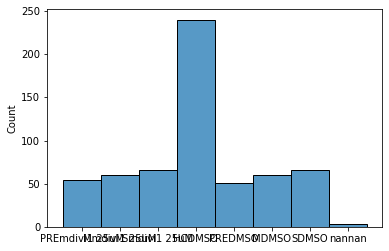

Total number of cell types 600


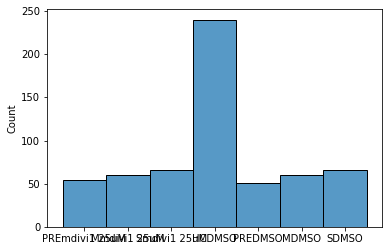

Total number of cells 597


In [14]:
cell_types =  mfn2_df["group"].values
sns.histplot(cell_types)
plt.show()
print(f'Total number of cell types {len(cell_types)}')
mfn2_df = mfn2_df.loc[cell_types != 'nannan']
sns.histplot(mfn2_df["group"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

In [15]:
mfn2_df["group"].value_counts()

HCDMSO            240
Smdivi1 25uM       66
SDMSO              66
Mmdivi1 25uM       60
MDMSO              60
PREmdivi1 25uM     54
PREDMSO            51
Name: group, dtype: int64

In [16]:
mfn2_df["plate"].value_counts()

p1     60
p3     60
p5     60
p6     60
p7     60
p8     60
p9     60
p10    60
p4     59
p2     58
Name: plate, dtype: int64

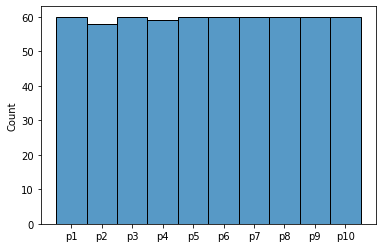

Total number of cell types 597


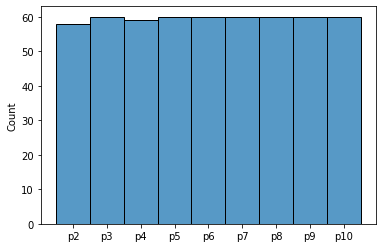

Total number of cells 537


In [17]:
plate_types =  mfn2_df["plate"].values
sns.histplot(plate_types)
plt.show()
print(f'Total number of cell types {len(plate_types)}')
mfn2_df = mfn2_df.loc[plate_types != 'p1']
sns.histplot(mfn2_df["plate"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

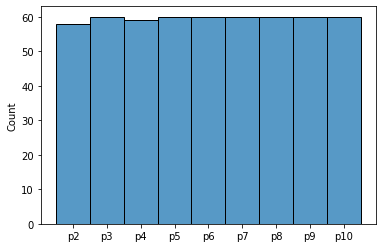

Total number of cell types 537


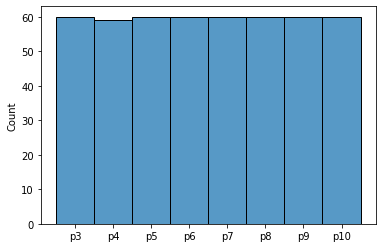

Total number of cells 479


In [18]:
plate_types =  mfn2_df["plate"].values
sns.histplot(plate_types)
plt.show()
print(f'Total number of cell types {len(plate_types)}')
mfn2_df = mfn2_df.loc[plate_types != 'p2']
sns.histplot(mfn2_df["plate"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

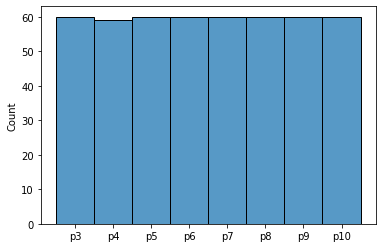

Total number of cell types 479


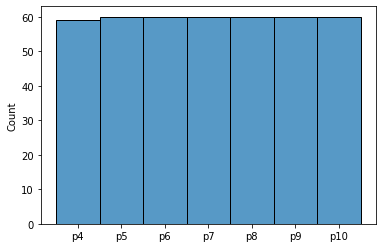

Total number of cells 419


In [19]:
plate_types =  mfn2_df["plate"].values
sns.histplot(plate_types)
plt.show()
print(f'Total number of cell types {len(plate_types)}')
mfn2_df = mfn2_df.loc[plate_types != 'p3']
sns.histplot(mfn2_df["plate"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

In [20]:
mfn2_df["group"].value_counts()

HCDMSO            168
Smdivi1 25uM       48
SDMSO              48
Mmdivi1 25uM       42
MDMSO              42
PREmdivi1 25uM     36
PREDMSO            35
Name: group, dtype: int64

In [114]:
# # Values to be removed based on the "Group" column
# groups_to_remove = ["HCDMSO1650.0p6", "HCDMSO1650.0p7", "HCDMSO1650.0p4",
# "HCDMSO1653.0p7", "HCDMSO1653.0p5", "HCDMSO495.0p7", "HCDMSO495.0p6",
# "HCDMSO143.0p7", "HCDMSO848.0p5", "HCDMSO1170.0p10"]
# # Remove rows with the specified values in the "Group" column
# mfn1_df = mfn1_df[~mfn1_df['group_with_p'].isin(groups_to_remove)]
# # Display the filtered DataFrame
# mfn1_df

,,,,,plate,Row,Column,Plane,Timepoint,modified_spots_chanel_4 - Total Spot Area - Mean per Well,modified_spots_chanel_4 - Relative Spot Intensity - Mean per Well,modified_spots_chanel_4 - Number of Spots - Mean per Well,modified_spots_chanel_4 - Number of Spots per Area of modified_spots_chanel_4 - Mean per Well,modified_spots_chanel_3 - Total Spot Area - Mean per Well,...,Time [s],Compound,Cell Type,Cell ID,Severity,pos,group,group_with_id,group_with_p,group_p
,group,group_with_id,group_with_p,group_p,,,,,,,,,,,,,,,,,,,,,
180,PREmdivi1 25uM,PREmdivi1 25uM4719.0,PREmdivi1 25uM4719.0p4,PREmdivi1 25uMp4,p4,r2,c2,1,0,5.416028,0.510847,1.038530,0.180028,15.342139,...,0.0,mdivi1 25uM,HD,4719.0,PRE,r2c2p4,PREmdivi1 25uM,PREmdivi1 25uM4719.0,PREmdivi1 25uM4719.0p4,PREmdivi1 25uMp4
181,Mmdivi1 25uM,Mmdivi1 25uM4819.0,Mmdivi1 25uM4819.0p4,Mmdivi1 25uMp4,p4,r2,c3,1,0,5.934011,0.509235,1.082709,0.171991,13.358364,...,0.0,mdivi1 25uM,HD,4819.0,M,r2c3p4,Mmdivi1 25uM,Mmdivi1 25uM4819.0,Mmdivi1 25uM4819.0p4,Mmdivi1 25uMp4
182,Smdivi1 25uM,Smdivi1 25uM4200.0,Smdivi1 25uM4200.0p4,Smdivi1 25uMp4,p4,r2,c4,1,0,5.843381,0.513037,1.074222,0.173729,13.415049,...,0.0,mdivi1 25uM,HD,4200.0,S,r2c4p4,Smdivi1 25uM,Smdivi1 25uM4200.0,Smdivi1 25uM4200.0p4,Smdivi1 25uMp4
184,HCDMSO,HCDMSO1653.0,HCDMSO1653.0p4,HCDMSOp4,p4,r2,c6,1,0,6.471074,0.515612,1.108316,0.165546,14.067673,...,0.0,DMSO,HC,1653.0,HC,r2c6p4,HCDMSO,HCDMSO1653.0,HCDMSO1653.0p4,HCDMSOp4
185,HCDMSO,HCDMSO848.0,HCDMSO848.0p4,HCDMSOp4,p4,r2,c7,1,0,6.798287,0.519994,1.127246,0.161853,14.563273,...,0.0,DMSO,HC,848.0,HC,r2c7p4,HCDMSO,HCDMSO848.0,HCDMSO848.0p4,HCDMSOp4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,SDMSO,SDMSO4476.0,SDMSO4476.0p10,SDMSOp10,p10,r7,c4,1,0,6.638008,0.523413,1.122344,0.164227,12.685509,...,0.0,DMSO,HD,4476.0,S,r7c4p10,SDMSO,SDMSO4476.0,SDMSO4476.0p10,SDMSOp10
596,HCDMSO,HCDMSO848.0,HCDMSO848.0p10,HCDMSOp10,p10,r7,c8,1,0,7.448643,0.520933,1.159241,0.155052,15.753524,...,0.0,DMSO,HC,848.0,HC,r7c8p10,HCDMSO,HCDMSO848.0,HCDMSO848.0p10,HCDMSOp10
597,SDMSO,SDMSO2165.0,SDMSO2165.0p10,SDMSOp10,p10,r7,c9,1,0,7.303365,0.520957,1.148826,0.156296,14.854338,...,0.0,DMSO,HD,2165.0,S,r7c9p10,SDMSO,SDMSO2165.0,SDMSO2165.0p10,SDMSOp10


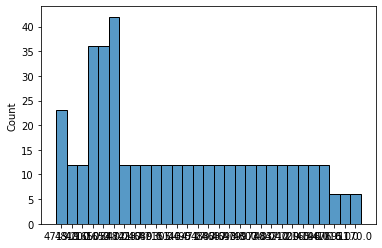

Total number of cell types 419


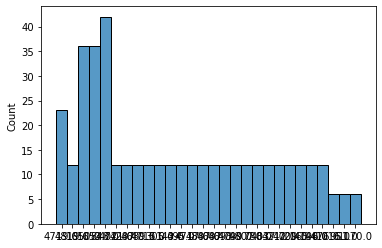

Total number of cells 407


In [21]:
mfn2_df["Cell ID"] = mfn2_df["Cell ID"].astype(str)
cell_types =  mfn2_df["Cell ID"].values
sns.histplot(cell_types)
plt.show()
print(f'Total number of cell types {len(cell_types)}')
mfn2_df = mfn2_df.loc[cell_types != '4200.0']
sns.histplot(mfn2_df["Cell ID"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

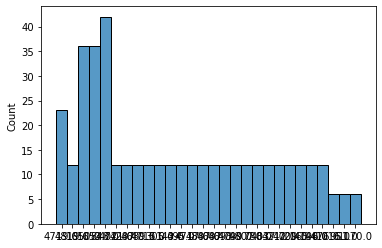

Total number of cell types 407


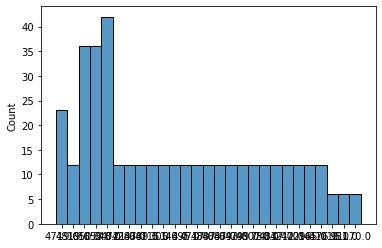

Total number of cells 395


In [22]:
cell_types =  mfn2_df["Cell ID"].values
sns.histplot(cell_types)
plt.show()
print(f'Total number of cell types {len(cell_types)}')
mfn2_df = mfn2_df.loc[cell_types != '4196.0']
sns.histplot(mfn2_df["Cell ID"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

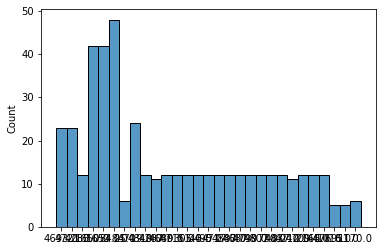

Total number of cell types 450


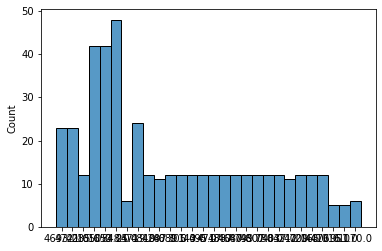

Total number of cells 438


In [311]:
# cell_types =  mfn1_df["Cell ID"].values
# sns.histplot(cell_types)
# plt.show()
# print(f'Total number of cell types {len(cell_types)}')
# mfn1_df = mfn1_df.loc[cell_types != '4715.0']
# sns.histplot(mfn1_df["Cell ID"].values)
# plt.show()
# print(f'Total number of cells {len(mfn1_df)}')

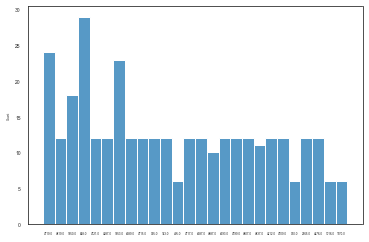

Total number of cell types 331


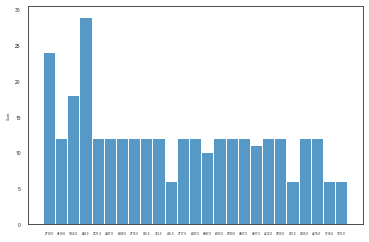

Total number of cells 308


In [106]:
# cell_types =  drp1_df["Cell ID"].values
# sns.histplot(cell_types)
# plt.show()
# print(f'Total number of cell types {len(cell_types)}')
# drp1_df = drp1_df.loc[cell_types != '1653.0']
# sns.histplot(drp1_df["Cell ID"].values)
# plt.show()
# print(f'Total number of cells {len(drp1_df)}')

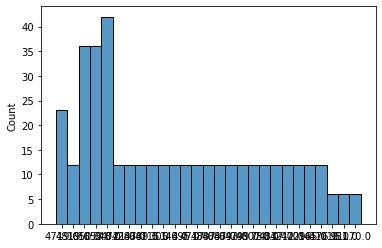

Total number of cell types 395


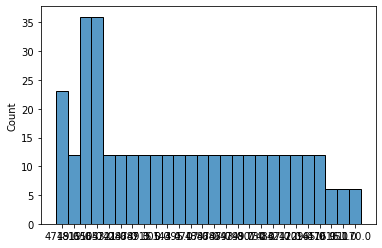

Total number of cells 353


In [23]:
cell_types =  mfn2_df["Cell ID"].values
sns.histplot(cell_types)
plt.show()
print(f'Total number of cell types {len(cell_types)}')
mfn2_df = mfn2_df.loc[cell_types != '848.0']
sns.histplot(mfn2_df["Cell ID"].values)
plt.show()
print(f'Total number of cells {len(mfn2_df)}')

In [24]:
#summary 1
mfn2_df_sum = mfn2_df.drop(columns=["group", "group_with_id","group_with_p", "group_p", "Cell ID", "plate", "Row", "Column", "Cell Type",
                                    "Plane", "Timepoint", "Height [µm]", "Time [s]", "Compound", "Severity", "pos" ])
mfn2_df_sum = mfn2_df_sum.reset_index()
mfn2_df_sum = mfn2_df_sum.drop(columns=["group_with_id","group", "group_p", "level_0"])
sum1 = summarize_dataframe(mfn2_df_sum, "group_with_p")
sum1 = sum1.reset_index()
sum1.to_csv(path + "//" + 'mfn2_sum1a.csv', index=None)

In [ ]:
# clear low and high cell count
cell_count =  mfn2_df["all_cells - Number of Objects"].values
sns.histplot(cell_count)
plt.show()
mfn2_df = mfn2_df.loc[cell_count<1200]
sns.histplot(mfn2_df["all_cells - Number of Objects"].values)
plt.show()
mfn2_df = mfn2_df.loc[cell_count>200]
sns.histplot(mfn2_df["all_cells - Number of Objects"].values)
plt.show()

In [32]:
mfn2_df.to_csv(path + "//" + 'mfn2_df1.csv', index=None)    

In [35]:
#count per group
mfn2_df_count = mfn2_df.groupby(level=1).mean()
mfn2_df_count = mfn2_df_count.reset_index()
count_cells = px.bar(mfn2_df_count, x = "group", y = "all_cells - Number of Objects",
            barmode = 'group')

count_cells.show()

In [ ]:
#keep features by corelation analysis
mfn2_df2 = mfn2_df[['group', 'group_with_id', "group_with_p", "Cell ID", "group_p",
                           "spots_chanel_4_final - Intensity_Spot chanel_4_final Mean - Mean per Well", "total_ir_chanel_4_normalized"]]
mfn2_df2.columns = [str(col) + '_mfn2' for col in mfn2_df2.columns]
mfn2_df2 = mfn2_df2.rename(
     columns={"group_mfn2":"group",
              "group_with_id_mfn2":"group_with_id",
              "group_with_p_mfn2":"group_with_p",
              "group_p_mfn2":"group_p",
              "Cell ID_mfn2":"Cell_id",
              "spots_chanel_4_final - Intensity_Spot chanel_4_final Mean - Mean per Well_mfn2":"mfn2_intensity",
              "total_ir_chanel_4_normalized_mfn2":"mfn2_area"})
print(mfn2_df2)
mfn2_df2.to_csv(path + "//" + 'mfn2_df2.csv', index=None)    

In [ ]:
#summary 2
mfn2_df_sum = mfn2_df2.drop(columns=["group", "group_with_id","group_with_p", "group_p"])
mfn2_df_sum = mfn2_df_sum.reset_index()
mfn2_df_sum = mfn2_df_sum.drop(columns=["Cell_id", "group_with_id","group", "level_0", "group_p"])
sum2 = summarize_dataframe(mfn2_df_sum, "group_with_p")
sum2 = sum2.reset_index()
sum2.to_csv(path + "//" + 'mfn2_sum2b.csv', index=None)

In [ ]:
# OUTLIER DETECTION MODE 
DataFrame_OutliersDetections = mfn2_df2.copy()
types = mfn2_df2["group"].unique()
mask = []
features = mfn2_df2.columns[5:]
#['LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX', 'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreIArea-UM', 'TmreIArea-R', 'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'Calceinarea', 'CalceinR', 'Nucarea', 'NucR', 'TmreTSarea', 'LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'CalceinIntensityMean', 'NucIntensityMean']
# features = ['LysoSpots-RSI', 'LysoSpots-CSI', 'LysoSpots-USPI', 'LysoSpots-SC', 'LysoSpots-SBI', 'LysoSpots-SAPX', 'LysoSpots-RI', 'LysoSpots-STRI', 'LysoSpots-SAUM', 'LysoSpots-SR', 'TmreSpots-RSI', 'TmreSpots-CSI', 'TmreSpots-USPI', 'TmreSpots-SC', 'TmreSpots-SBI', 'TmreSpots-SAPX', 'TmreSpots-RI', 'TmreSpots-STRI', 'TmreSpots-SAUM', 'TmreIArea-UM', 'TmreIArea-R', 'LysoIArea-UM', 'LysoIArea-R', 'TmreIntensityMean', 'TmreIntensitySum', 'Calceinarea', 'CalceinR', 'Nucarea', 'NucR', 'TmreTSarea', 'LysointensityMean', 'LysointensitySum', 'LysoTSarea', 'CalceinIntensityMean', 'NucIntensityMean']
print(types)
# detector_list = ['pca_approx', 'robust_cov']


detector_list = [
    
        (
        "Local Outlier Factor 8",
        LocalOutlierFactor(n_neighbors=8),
    ),
    (
        "Local Outlier Factor 10",
        LocalOutlierFactor(n_neighbors=10),
    ),
        (
         "Local Outlier Factor 30",
        LocalOutlierFactor(n_neighbors=30),
        ),
    ]

In [55]:
for name, algorithm in detector_list:
    errors = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)
    outliers = np.full(len(DataFrame_OutliersDetections),fill_value=np.nan)

    for type in types:
        x = DataFrame_OutliersDetections.loc[:,features].values
        F = x.sum(1)
        mask = np.zeros(x.shape[0])
        mask[np.isfinite(F)] = 1
        mask_type = mask * np.array(DataFrame_OutliersDetections["group"] == type)
        Curr_df = DataFrame_OutliersDetections.loc[mask_type==1,features]

        x = Curr_df.values
        if name == 'pca_approx':

            x = StandardScaler().fit_transform(x)
            # F = x.sum(1)
            # x = x[np.isfinite(F),:]
            # mask[1-np.isfinite(F)] = False
            # pd.DataFrame(data = Curr_df, columns = features).head()
            # pca = PCA(n_components=2)
            lower_dimensional_data = algorithm.fit_transform(x)
            pproximation = algorithm.inverse_transform(lower_dimensional_data)

            err = np.linalg.norm(x-pproximation,2,axis=1)

            errors[mask_type==1] = err
            outliers[mask_type==1] = (err < 5) * 2 - 1
            if False:
                plt.scatter(lower_dimensional_data[:,0],lower_dimensional_data[:,1],c=err>5)
                plt.title(type)
                plt.show()
        else:
            algorithm.fit(x)
            if name == "Robust covariance":
                errors[mask_type==1] = algorithm.mahalanobis(x)
                outliers[mask_type==1] = algorithm.predict(x)

            if  "Local Outlier Factor" in name:
                errors[mask_type==1] = algorithm.negative_outlier_factor_
                outliers[mask_type==1] = algorithm.fit_predict(x)
            else:
                y_pred = algorithm.fit(x).predict(x)



        # Curr_df[name] = errors[mask_type==1]
        # Curr_df[f'{name}_outliers'] = outliers[mask_type==1]
        # Curr_df.set_index(name, inplace = True,
        #                         append = True, drop = False)
        # file =   f'{type}_df_outliers_det.csv'
        # Curr_df.to_csv(file)
    DataFrame_OutliersDetections[name] = errors
    DataFrame_OutliersDetections[f'{name}_outliers'] = outliers
    DataFrame_OutliersDetections.set_index(name, inplace = True,
                            append = True, drop = False)

    DataFrame_OutliersDetections.to_csv(path + "//" + 'mfn2_df4.csv', index=None)    

In [ ]:
DataFrame_OutliersDetections["group"].value_counts()

In [ ]:
df_clean = DataFrame_OutliersDetections[DataFrame_OutliersDetections['Local Outlier Factor 10_outliers'] == 1]
df_clean["group"].value_counts()

In [ ]:
## export for integ

In [ ]:
df_integ = df_clean.groupby(level=2).mean()
df_integ = df_integ.reset_index()

In [86]:
df_clean.to_csv(path + "//" + 'mfn2_df5.csv', index=None)    
df_integ.to_csv(path + "//" + 'mfn2_df_integ.csv', index=None)    

In [ ]:
#normalize data

In [66]:
#hc mean norm
hc = df_clean[(df_clean['group'] == 'HCDMSO')]
hc_mean = hc.mean()
Nh_df = df_clean/hc_mean

C:\Users\Uri8s\AppData\Local\Temp/ipykernel_28376/1008584565.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [69]:
df_log = df_clean.drop(columns=["group_with_p", "group", "group_with_id", "group_p",
                           'Local Outlier Factor 8', "Cell_id",
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 10',
       'Local Outlier Factor 10_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for col in df_log:
    df_log[col] = np.log(df_log[col])
    NL_df = df_log.copy()

In [73]:
df_log_2 = df_clean.drop(columns=["group_with_p", "group", "group_with_id", "group_p",
                           'Local Outlier Factor 8', "Cell_id",
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 10',
       'Local Outlier Factor 10_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for col in df_log_2:
        df_log_2[col] = np.log(1+df_log_2[col]-min(df_log_2[col]))
        NL2_df = df_log_2.copy()

In [74]:
df_max_scaled = df_clean.drop(columns=["group_with_p", "group", "group_with_id", "group_p",
                           'Local Outlier Factor 8', "Cell_id",
       'Local Outlier Factor 8_outliers', 'Local Outlier Factor 10',
       'Local Outlier Factor 10_outliers', 'Local Outlier Factor 30',
       'Local Outlier Factor 30_outliers'])
for column in df_max_scaled.columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
        NM_df = df_max_scaled.copy()

In [75]:
#initialze the excel writer
writer = pd.ExcelWriter(path + '//' + 'mfn2_normalzied-excel.xlsx', engine='xlsxwriter')

    #store your dataframes in a  dict, where the key is the sheet name you want
frames = {'hc': Nh_df, 'log': NL_df, 'log2':NL2_df,
              'max': NM_df}
    #frames = {'HCUN': HCUN, 'DSUN': DSUN}
    #now loop thru and put each on a specific sheet
for sheet, frame in  frames.items(): # .use .items for python 3.X
    frame.to_excel(writer, sheet_name = sheet)

    #critical last step
writer.save()
    #writer.close()
print('done')

done


In [ ]:
#feat QC

In [ ]:
df_var_calc = df_clean.copy()
df_var_calc = df_var_calc.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 30_outliers',
       'Local Outlier Factor 10', 'Local Outlier Factor 10_outliers',
       'Local Outlier Factor 8', 'Local Outlier Factor 8_outliers', 'group', "Cell_id",
       'group_with_id', 'group_with_p', 'group_p'])

In [ ]:
#variance each feature
feature_variances = df_var_calc.var()

##standard deviation each feature
feature_std_devs = df_var_calc.std()

###CV each feature
feature_cv = df_var_calc.std() / df_var_calc.mean()

###printresults
print("Feature Variance:")
print(feature_variances)

print("\nFeature Standard Deviation:")
print(feature_std_devs)

print("\nFeature Coefficient of Variation (CV):")
print(feature_cv)


feature_variances.to_csv(path + "//" + 'mfn2-feature_variances.csv', index=None)
feature_std_devs.to_csv(path + "//" + 'mfn2-feature_std_devs.csv', index=None)
feature_cv.to_csv(path + "//" + 'mfn2-feature_coefficient_of_variation.csv', index=None)

In [ ]:
# Visualization
# Plot feature variances
plt.bar(range(len(feature_variances)), feature_variances, align='center')
plt.xticks(range(len(feature_variances)), feature_variances.index, rotation=45)
plt.title('Feature Variance')
plt.ylabel('Variance')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "mfn2-feature_var.pdf", dpi = 600)
plt.close()
print("var_done!")

In [ ]:
# Plot feature standard deviations
plt.bar(range(len(feature_std_devs)), feature_std_devs, align='center')
plt.xticks(range(len(feature_std_devs)), feature_std_devs.index, rotation=45)
plt.title('Feature Standard Deviation')
plt.ylabel('Standard Deviation')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "mfn2-feature_sd.pdf", dpi = 600)
plt.close()
print("sd_done!")

In [ ]:
# Plot feature coefficient of variation
plt.bar(range(len(feature_cv)), feature_cv, align='center')
plt.xticks(range(len(feature_cv)), feature_cv.index, rotation=45)
plt.title('Feature Coefficient of Variation (CV)')
plt.ylabel('Coefficient of Variation')
plt.xlabel('features')
plt.show()
plt.savefig(path + '//' + "mfn2-feature_cv.pdf", dpi = 600)
plt.close()
print("cv_done!")

plt.tight_layout()
plt.show()

In [83]:
### make sure to groupby mean before plotting

In [ ]:
df_plot = df_log.groupby(level=5).mean()
df_plot = df_plot.reset_index()

In [86]:
for col in df_plot:
    
    fig = px.bar(df_plot, x = "group_with_id", y = col,
            barmode = 'group')
    fig.write_image(path + '//' + f"{col}mid_plot_image.pdf", engine="kaleido")
    fig.show()

In [ ]:
dist_check_if_hc(Nh_df)
dist_check_if_log(df_log)
dist_check_if_log_2(df_log_2)
dist_check_if_max(df_max_scaled)

In [ ]:
### vis+stats_marker conclusions 

In [ ]:
df_stats = df_log.copy()
df_stats = df_stats.reset_index()
df_stats = df_stats.drop(columns=['Local Outlier Factor 30', 'Local Outlier Factor 10', 'Local Outlier Factor 8', 'level_0'])
df_stats = df_stats.reset_index()
df_stats = df_stats.drop(columns=['index'])

In [ ]:
grouped_df = df_stats.groupby("group").mean()
grouped_df.fillna(0, inplace=True)
grouped_df =(grouped_df-grouped_df.mean())/grouped_df.std()
###heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_df, cmap='BuPu')
sns.set_style("white")
SMALL_SIZE =3
MEDIUM_SIZE = 5
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
cax = plt.gcf().axes[0]
cax.tick_params(labelsize=6)
plt.yticks(rotation="horizontal")
plt.xticks(rotation="vertical")
plt.margins(0.1)
plt.subplots_adjust(bottom=0.3)
plt.savefig(path + '//' + "heatmap_mfn2.pdf")
plt.show()


In [100]:
### box plots all feat
for col in df_stats.columns[3:]:
    
    fig = px.box(df_stats, x = "group", y = col, hover_data=["group_with_p"],
                 points="all", color="group",
            notched=True)
    fig.update_xaxes(categoryorder='array', categoryarray= ['HCDMSO', 'PREDMSO', 'PREmdivi1 25uM',
                                                            'MDMSO', 'Mmdivi1 25uM', 
                                                           'SDMSO', 'Smdivi1 25uM'])
    fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
    fig.update_layout(
    font_family="Arial",
    font_color="Black",
    font_size=20,
    font=dict(
        family="Arial",
        size=20,
        color="Black"
    )
)

    fig.write_image(path + '//' + f"{col}box_plot_image.pdf", engine="kaleido")
    fig.show()

In [ ]:
#statistics

In [102]:
#DEF GROUPS
#hc
HC = df_stats[(df_stats['group'] == 'HCDMSO')]
HC_intensity_mean = HC[["mfn2_intensity"]]
HC_area = HC[["mfn2_area"]]
#ds
#Sev
S = df_stats[(df_stats['group'] == 'SDMSO')]
S_intensity_mean = S[["mfn2_intensity"]]
S_area = S[["mfn2_area"]]
#Mild
M = df_stats[(df_stats['group'] == 'MDMSO')]
M_intensity_mean = M[["mfn2_intensity"]]
M_area = M[["mfn2_area"]]
#Pre
P = df_stats[(df_stats['group'] == 'PREDMSO')]
P_intensity_mean = P[["mfn2_intensity"]]
P_area = P[["mfn2_area"]]
#dsT
#Sev
ST = df_stats[(df_stats['group'] == 'Smdivi1 25uM')]
ST_intensity_mean = ST[["mfn2_intensity"]]
ST_area = ST[["mfn2_area"]]
#Mild
MT = df_stats[(df_stats['group'] == 'Mmdivi1 25uM')]
MT_intensity_mean = MT[["mfn2_intensity"]]
MT_area = MT[["mfn2_area"]]
#Pre
PT = df_stats[(df_stats['group'] == 'PREmdivi1 25uM')]
PT_intensity_mean = PT[["mfn2_intensity"]]
PT_area = PT[["mfn2_area"]]


In [103]:
# hc vs ds 
one_list = [(S_intensity_mean), (HC_intensity_mean)]
two_list = [(M_intensity_mean), (HC_intensity_mean)]
three_list = [(P_intensity_mean), (HC_intensity_mean)]
#ds vs dst 
one2_list = [(S_intensity_mean), (ST_intensity_mean)]
two2_list = [(M_intensity_mean), (MT_intensity_mean)]
three2_list = [(P_intensity_mean), (PT_intensity_mean)]
#DS vs ds 
one3_list = [ (S_intensity_mean), (M_intensity_mean)]
two3_list = [(S_intensity_mean), (P_intensity_mean)]
three3_list = [(M_intensity_mean), (P_intensity_mean)]
#general lists 
all_list = (one_list, two_list, three_list)
sec_list = (one2_list, two2_list, three2_list)
t_list = (one3_list, two3_list, three3_list)

In [104]:
def t_function(list):
    for item in list:
        name = [i for i in globals() if globals()[i] is item][0]
        item1 = list[0]
        item2 = list[1]
        twosample_results = scipy.stats.ttest_ind(item1, item2, equal_var=False, permutations=1000)
        matrix_twosample = [
        ['', 'Test Statistic', 'p-value'],
        ['{}'.format(name), twosample_results[0], twosample_results[1]]
    ]
        twosample_table = FF.create_table(matrix_twosample, index=True)
        cf.go_offline()
        iplot(twosample_table, filename='{}twosample-table')

In [ ]:
for x in all_list:
    t_function(x)
    print('done')

In [ ]:
for x in sec_list:
    t_function(x)
    print('done')

In [ ]:
for x in t_list:
    t_function(x)
    print('done')

In [ ]:
######################